# **Handwritten Digit Detection- Classification Analysis**

# **Objective**

## **The objective of this project is to build a machine learning model that can correctly classify handwritten digits from the load_digits dataset. The dataset contains 8x8 images of digits from 0-9, and the goal is to train a model to correctly classify each image to the correct digit.**

# **Importing Libraries**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# **Loading Dataset**

In [68]:
digits = load_digits()
# This will return a dictionary-like object containing the features, target values, and other metadata about the dataset.


In [69]:
print(digits.keys())


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


## **We can see that the dataset contains the following keys:**
* data: A 2D array containing the features of the dataset.
* target: A 1D array containing the target values (i.e., the digit labels) of the dataset.
* images: A 3D array containing the images of the dataset.





In [70]:
print('Data shape:', digits.data.shape)
print('Target shape:', digits.target.shape)
print('Images shape:', digits.images.shape)


Data shape: (1797, 64)
Target shape: (1797,)
Images shape: (1797, 8, 8)


**We can see that there are 1797 samples in the dataset, each with 64 features (i.e., the 8x8 images have been flattened into a 1D array). There are also 1797 target values, and 1797 images with a shape of 8x8 pixels.**

# **Data Preprocessing & Train Test Split**

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=42)
scaler = StandardScaler()


In [73]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Data Visualization**

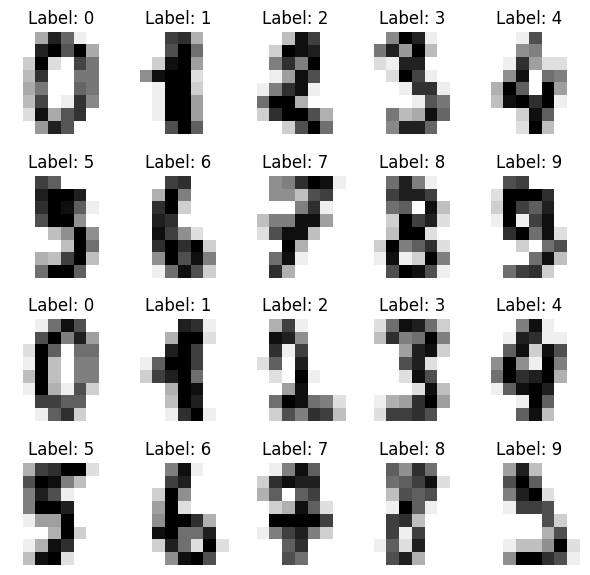

In [74]:
# Display a sample of the data as images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

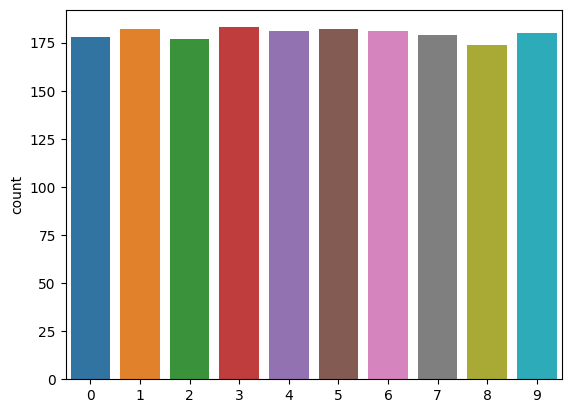

In [75]:
# Plot the distribution of the target variable
sns.countplot(x=digits.target)
plt.show()

In [76]:
# Perform PCA on the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(digits.data)

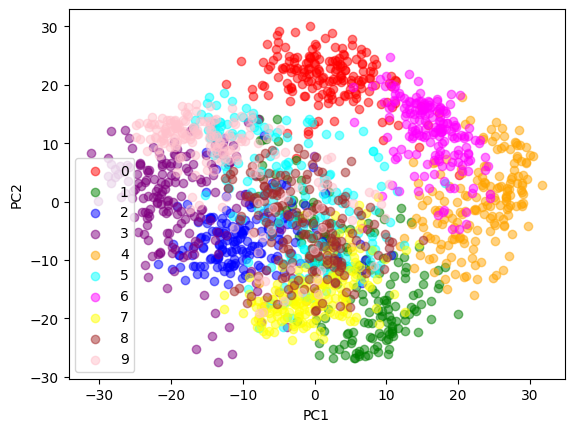

In [77]:
# Plot the principal components of the data
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
for i in range(10):
    plt.scatter(X_pca[digits.target == i, 0], X_pca[digits.target == i, 1], color=colors[i], label=str(i), alpha=0.5)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# **Model Building**

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
LR_model = LogisticRegression(max_iter=1000)


In [80]:
LR_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# **Model Evaluation**

In [81]:
y_pred = LR_model.predict(X_test)


In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy*100:.3f}')


Model accuracy: 97.111


 ## **Our model has got 97% Accuracy**

In [84]:
# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.95      0.95      0.95        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.93      0.97      0.95        38
           9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [85]:
import seaborn as sns

In [86]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

In [87]:
# Convert the report to a dataframe
df = pd.DataFrame(report).transpose()

In [88]:
# Remove the 'support' column
df = df.drop('support', axis=1)

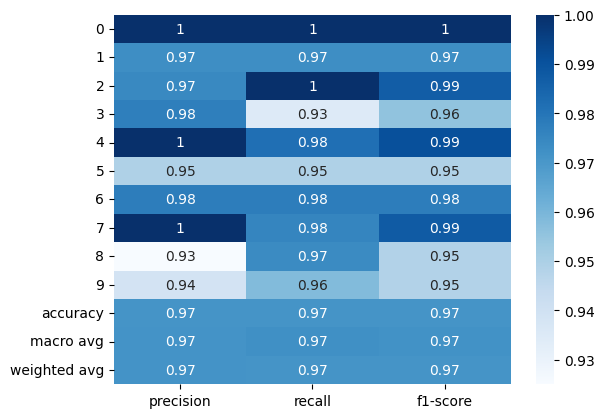

In [89]:
# Plot the heatmap
sns.heatmap(df, annot=True, cmap='Blues')
plt.show()

# **visualize the performance of the model using a confusion matrix:**

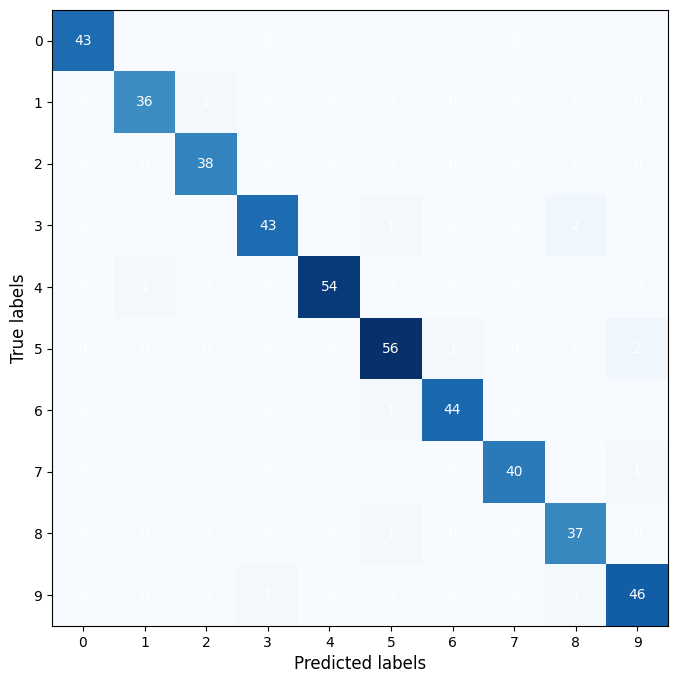

In [90]:
confusion = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted labels', fontsize=12, color='black')
ax.set_ylabel('True labels', fontsize=12, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
for i in range(10):
    for j in range(10):
        ax.text(j, i, confusion[i, j], ha='center', va='center', color='white')
plt.show()


### **From the confusion matrix, we can see that the model performs well on most digits, but struggles with some of the more difficult ones (such as 8 and 9).**

# **Model Testing and Conclusion**

In [91]:
# Testing Our Model
X_test = load_digits().data[8]
test = scaler.transform(X_test.reshape(1, -1))
y_pred = LR_model.predict(test)
y_pred

array([8])

In [92]:
print(f"Predicted digit: {y_pred[0]}")

Predicted digit: 8



## * In this project, we loaded and preprocessed the load_digits dataset-
## * we trained a logistic regression model on the preprocessed data-
## * we evaluated its performance on the testing data. 
## * The model achieved a high accuracy on the testing data-